In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [14]:
n_pts =100 #number of dots which is our dataset
centers = [[-0.5,0.5],[0.5 , -0.5]] #centers of our dots and classes for classification wich should be a numpy array
x , y = datasets.make_blobs(n_samples = n_pts , random_state = 123 ,centers = centers, cluster_std = 0.4) 
#random state is for having equal dots in every runnig and cluster state is for region scattering data
print(x)
print(y)

#x and y are numpy arrays
#for data to be trained they should be tensors
x_data = torch.Tensor(x)
y_data = torch.Tensor(y.reshape([100,1])) #y_data = torch.Tensor(y.reshape([100,1])) write this if u had an error for dimension

[[-0.13715792 -0.07147228]
 [ 0.80437976 -0.37061246]
 [-0.60224775 -0.61943564]
 [ 0.57087693 -0.5119872 ]
 [ 0.0063745   0.15330384]
 [-0.87433355  0.97033162]
 [ 0.19742512 -0.37132537]
 [-0.6340043   0.91244578]
 [-0.48180397  0.40676318]
 [ 0.19748489  0.18077491]
 [-0.62590326  0.06563904]
 [-0.31262435  0.16753801]
 [-0.1085056   1.39525734]
 [ 0.09825765  0.92775707]
 [-0.36456438  0.4952678 ]
 [ 0.75682188 -1.29115517]
 [ 0.33484534  0.56577649]
 [-0.66134642  0.44958817]
 [ 0.34335208 -0.44400876]
 [-0.42758595  0.97114478]
 [-0.09837844  0.65447456]
 [ 0.45694611  0.66516486]
 [-0.12901503  0.43054573]
 [ 0.67045866 -1.1421639 ]
 [ 0.82493653 -0.30010394]
 [ 0.72261948 -0.58483205]
 [-0.49886163  0.77528908]
 [-0.03991778 -0.00694082]
 [ 1.05814117 -0.64357437]
 [ 0.60152659 -0.38650986]
 [ 0.57181979 -1.24479028]
 [-0.20505257  1.09629281]
 [ 1.14347639 -0.60809296]
 [-0.97932046  0.57980963]
 [ 0.20367449 -0.4708371 ]
 [-0.79298479  0.01499075]
 [ 0.5081264  -0.57758555]
 

In [3]:
def scatter_plot():
    plt.scatter( x[y==0 , 0], x[y==0 ,1] )
    plt.scatter( x[y==1 , 0], x[y==1 ,1] )

In [15]:
class Model(nn.Module):
    def __init__(self , input_size , output_size):
        super().__init__()
        self.Linear = nn.Linear(input_size , output_size) #nn.Linear arguments should be input size and output size of one layer
    
    def forward(self, x):
        pred = torch.sigmoid(self.Linear(x))
        return pred
    
    def predict(self , x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0

In [16]:
torch.manual_seed(2)
model = Model(2,1) #  we have 2 weights and one out put wich tells 0 or 1 for each cluster
#print(list(model.parameters())) #if we dont declare list it wouldnt return numbers

In [17]:
[w , b] = model.parameters() #we should have first w and b in every trainig code for every object
w1 , w2 = w.view(2) #to seprate x1 and x2 as our weights
def get_params():
    return(w1.item(), w2.item(), b[0].item()) #make sure you turn b[0] and not b

In [18]:
def plot_fit(title):
    plt.titile = title
    w1, w2 , b1 = get_params()
    x1 = np.array([-2 , 2]) #it is an array for plotting and not for training
    x2 = (w1*x1 + b1)/ (-w2)
    plt.plot(x1,x2 , 'r')
    scatter_plot()

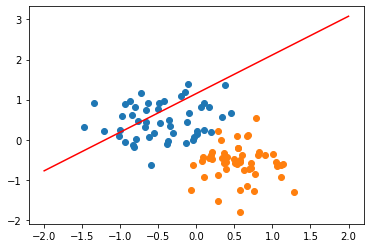

In [19]:
plot_fit("Second model")

In [20]:
#from now on we want to train dataset
criterion = nn.BCELoss() #binary cross enthropy loss
optimizer = torch.optim.SGD(model.parameters() , lr = 0.1) #or u can use Adam

In [21]:
epoch = 1000
losses = []
for i in range(epoch):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred , y_data) #make sure you are using tensor format of dataset x and y
    print("epoch = ", i , "loss = ", loss.item())
    
    
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() #if not written we would not proceed to the next iteration

epoch =  0 loss =  0.6185115575790405
epoch =  1 loss =  0.5708222985267639
epoch =  2 loss =  0.5285906195640564
epoch =  3 loss =  0.4912733733654022
epoch =  4 loss =  0.4577789008617401
epoch =  5 loss =  0.42704418301582336
epoch =  6 loss =  0.39862921833992004
epoch =  7 loss =  0.3725408613681793
epoch =  8 loss =  0.34886234998703003
epoch =  9 loss =  0.3275769352912903
epoch =  10 loss =  0.3085334300994873
epoch =  11 loss =  0.2914774417877197
epoch =  12 loss =  0.276114821434021
epoch =  13 loss =  0.2621768116950989
epoch =  14 loss =  0.24945761263370514
epoch =  15 loss =  0.23781703412532806
epoch =  16 loss =  0.227161705493927
epoch =  17 loss =  0.2174224704504013
epoch =  18 loss =  0.20853687822818756
epoch =  19 loss =  0.20043906569480896
epoch =  20 loss =  0.19305680692195892
epoch =  21 loss =  0.18631306290626526
epoch =  22 loss =  0.18013069033622742
epoch =  23 loss =  0.1744379997253418
epoch =  24 loss =  0.1691729724407196
epoch =  25 loss =  0.16428

epoch =  322 loss =  0.03447815775871277
epoch =  323 loss =  0.03440971300005913
epoch =  324 loss =  0.034341610968112946
epoch =  325 loss =  0.03427387401461601
epoch =  326 loss =  0.034206464886665344
epoch =  327 loss =  0.03413941338658333
epoch =  328 loss =  0.034072693437337875
epoch =  329 loss =  0.03400631248950958
epoch =  330 loss =  0.03394027054309845
epoch =  331 loss =  0.03387456759810448
epoch =  332 loss =  0.03380918502807617
epoch =  333 loss =  0.03374413028359413
epoch =  334 loss =  0.033679403364658356
epoch =  335 loss =  0.03361499682068825
epoch =  336 loss =  0.0335509218275547
epoch =  337 loss =  0.03348715603351593
epoch =  338 loss =  0.033423710614442825
epoch =  339 loss =  0.03336057439446449
epoch =  340 loss =  0.03329775854945183
epoch =  341 loss =  0.03323524072766304
epoch =  342 loss =  0.03317303955554962
epoch =  343 loss =  0.03311113268136978
epoch =  344 loss =  0.033049535006284714
epoch =  345 loss =  0.03298823535442352
epoch =  34

epoch =  673 loss =  0.021825725212693214
epoch =  674 loss =  0.0218067429959774
epoch =  675 loss =  0.02178780362010002
epoch =  676 loss =  0.021768920123577118
epoch =  677 loss =  0.021750083193182945
epoch =  678 loss =  0.021731305867433548
epoch =  679 loss =  0.021712569519877434
epoch =  680 loss =  0.021693885326385498
epoch =  681 loss =  0.021675245836377144
epoch =  682 loss =  0.021656664088368416
epoch =  683 loss =  0.021638114005327225
epoch =  684 loss =  0.021619632840156555
epoch =  685 loss =  0.02160119265317917
epoch =  686 loss =  0.021582793444395065
epoch =  687 loss =  0.02156445011496544
epoch =  688 loss =  0.021546153351664543
epoch =  689 loss =  0.021527905017137527
epoch =  690 loss =  0.021509697660803795
epoch =  691 loss =  0.02149154245853424
epoch =  692 loss =  0.021473431959748268
epoch =  693 loss =  0.021455366164445877
epoch =  694 loss =  0.021437356248497963
epoch =  695 loss =  0.021419387310743332
epoch =  696 loss =  0.02140145935118198

Text(0, 0.5, 'loss')

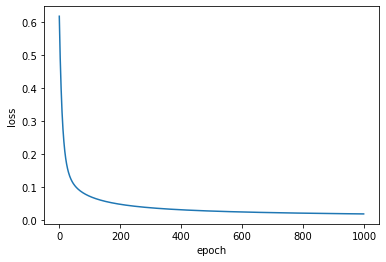

In [22]:
plt.plot(range(epoch), losses)
plt.xlabel('epoch')
plt.ylabel('loss')

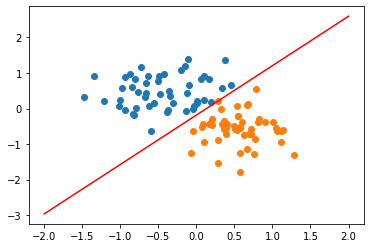

In [23]:
plot_fit('Trained model')

red point being in class orange probability = 3.3850591600603774e-12
black point being in class orange probability = 1.0
red point in class = 0
black point in class = 1


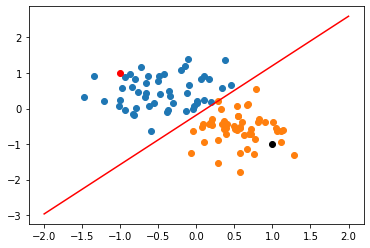

In [25]:
point1 = torch.Tensor([-1 , 1])  #class 0
point2 = torch.Tensor([1 , -1])  #class 1 
# the order of the class numbers are based on our above declaration of scatters

plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro') #or u can use point1.detach().numpy()[0], point1.numpy()[1], 'ro' to make sure u willl have numpy array
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')

print("red point being in class orange probability = {}".format(model.forward(point1).item()))
print("black point being in class orange probability = {}".format(model.forward(point2).item()) )
plot_fit('trained model')

#based on declaration
#class 0(blue) will have less equal probability than 0.5
#class 1(orange) will have greater equal probability than 0.5

print("red point in class = {}".format(model.predict(point1)))
print("black point in class = {}".format(model.predict(point2)))